<a href="https://colab.research.google.com/github/NguyenVanVuong613/YOLOv11/blob/main/YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/data.zip

In [ ]:
!nvidia-smi

Thu Oct 10 08:24:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.7/112.6 GB disk)


In [ ]:
!pip install opencv-python matplotlib


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available.")
else:
    device = torch.device("cpu")
    print("GPU is not available.")


GPU is available.


In [ ]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n.yaml")  # build a new model from YAML
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights
model.to(device)

# Train the model
results = model.train(data="/content/data/data.yaml", epochs=100, imgsz=640,)

engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=Fal

train: Scanning /content/data/train/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/data/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.86G      1.666      3.689     0.9613        309        640: 100%|██████████| 19/19 [00:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         49       1174    0.00124    0.00959    0.00137   0.000365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.08G      1.568      2.131     0.8965        238        640: 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         49       1174   0.000333    0.00283   0.000204   5.73e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.21G      1.588      1.469     0.9004        294        640: 100%|██████████| 19/19 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1174     0.0158      0.132     0.0695     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.13G      1.458      1.276     0.8784        467        640: 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         49       1174     0.0305      0.291      0.129     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.11G      1.426      1.217     0.8746        335        640: 100%|██████████| 19/19 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         49       1174       0.81      0.128      0.176     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.15G      1.519      1.212     0.8725        525        640: 100%|██████████| 19/19 [00:07<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         49       1174      0.834      0.129      0.103     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.21G      1.476      1.159     0.8728        336        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49       1174      0.831      0.236      0.203     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.08G      1.407      1.122     0.8657        205        640: 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         49       1174      0.908      0.259      0.278      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.08G      1.445      1.116     0.8686        369        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1174      0.791      0.259      0.267      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.21G      1.442      1.053     0.8567        260        640: 100%|██████████| 19/19 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         49       1174      0.841      0.267      0.296      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.23G      1.348      1.037       0.86        210        640: 100%|██████████| 19/19 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49       1174      0.885      0.268       0.32      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.07G      1.333      1.008     0.8514        305        640: 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         49       1174      0.875      0.291      0.346      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.2G      1.315     0.9797     0.8493        233        640: 100%|██████████| 19/19 [00:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49       1174      0.532      0.347      0.353       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.13G      1.259     0.9473     0.8488        305        640: 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         49       1174      0.592      0.357      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.16G      1.227     0.9315     0.8467        356        640: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1174      0.546      0.353      0.361       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.27G      1.324     0.9485     0.8481        363        640: 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49       1174      0.656      0.414      0.449      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.16G      1.288     0.9117     0.8487        185        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         49       1174      0.678      0.429       0.46      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.12G      1.312     0.9014     0.8494        342        640: 100%|██████████| 19/19 [00:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49       1174      0.801      0.444      0.498      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.17G      1.282     0.8621     0.8465        371        640: 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         49       1174      0.735      0.519      0.521      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.21G      1.257     0.8336     0.8417        359        640: 100%|██████████| 19/19 [00:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         49       1174      0.815      0.513      0.553      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.12G      1.305     0.8328     0.8452        455        640: 100%|██████████| 19/19 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         49       1174      0.791      0.559       0.57      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.12G      1.232     0.8006     0.8442        188        640: 100%|██████████| 19/19 [00:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         49       1174      0.818       0.52      0.563       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.18G      1.169     0.7726     0.8353        313        640: 100%|██████████| 19/19 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         49       1174      0.849      0.538      0.605      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.1G       1.23     0.7771     0.8419        299        640: 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         49       1174       0.77      0.472      0.524      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.07G      1.194     0.7677      0.842        254        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         49       1174      0.776      0.504      0.567      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.18G      1.175     0.7496     0.8325        343        640: 100%|██████████| 19/19 [00:08<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         49       1174      0.849      0.551      0.614      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.14G      1.186     0.7541     0.8386        231        640: 100%|██████████| 19/19 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         49       1174      0.816      0.592      0.609      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.26G      1.165     0.7324     0.8379        377        640: 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         49       1174      0.833       0.55      0.602      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.15G      1.223     0.7736     0.8377        325        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         49       1174      0.781      0.593      0.605      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.08G      1.149     0.7341     0.8351        297        640: 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         49       1174      0.822       0.58       0.62        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.13G      1.146     0.7123     0.8297        402        640: 100%|██████████| 19/19 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         49       1174       0.77      0.583      0.615      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.12G      1.176     0.7328      0.834        252        640: 100%|██████████| 19/19 [00:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49       1174      0.828      0.575      0.652      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.13G      1.134     0.7118     0.8293        260        640: 100%|██████████| 19/19 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         49       1174      0.857      0.578      0.666      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.09G      1.133       0.69     0.8336        376        640: 100%|██████████| 19/19 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1174      0.853      0.572      0.659      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.07G      1.182     0.6955     0.8382        266        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49       1174      0.845      0.614       0.66      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.08G      1.135      0.687     0.8373        366        640: 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1174      0.874      0.563      0.655      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.13G      1.115     0.6734     0.8299        231        640: 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1174      0.862      0.587      0.658      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.08G      1.094     0.6543      0.827        294        640: 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1174      0.869      0.581      0.673      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.1G      1.074     0.6566     0.8276        341        640: 100%|██████████| 19/19 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1174      0.883      0.617      0.702      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.15G      1.073     0.6496     0.8278        416        640: 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         49       1174       0.87      0.598      0.693      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.1G      1.105     0.6605     0.8332        285        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49       1174      0.909      0.558      0.695       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.12G      1.075     0.6373     0.8241        339        640: 100%|██████████| 19/19 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1174      0.843      0.637      0.697      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.1G      1.096     0.6453      0.825        244        640: 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49       1174      0.864      0.632      0.711      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.08G       1.09     0.6441     0.8314        351        640: 100%|██████████| 19/19 [00:08<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         49       1174      0.868      0.624      0.719      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.17G      1.107     0.6492     0.8288        277        640: 100%|██████████| 19/19 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         49       1174      0.855      0.635      0.694      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.1G      1.129     0.6491     0.8234        240        640: 100%|██████████| 19/19 [00:08<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49       1174      0.876       0.61      0.702      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.2G      1.058     0.6127     0.8257        353        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         49       1174       0.85       0.66       0.71      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.15G      1.101     0.6312     0.8258        355        640: 100%|██████████| 19/19 [00:08<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49       1174      0.774      0.645      0.704      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.13G      1.098     0.6242     0.8262        332        640: 100%|██████████| 19/19 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         49       1174      0.776      0.679       0.71      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.15G      1.111     0.6175     0.8325        247        640: 100%|██████████| 19/19 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49       1174      0.883       0.59      0.696      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.08G      1.092     0.6377     0.8287        201        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1174      0.799      0.689       0.71      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.11G      1.085     0.6223     0.8241        287        640: 100%|██████████| 19/19 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         49       1174      0.818      0.683      0.716       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.12G       1.09     0.6239     0.8215        370        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         49       1174      0.835      0.677      0.719      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.09G      1.077     0.6179     0.8234        335        640: 100%|██████████| 19/19 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         49       1174      0.764      0.629      0.688       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.12G      1.033     0.6023     0.8272        197        640: 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49       1174      0.814      0.663      0.715       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.24G      1.054     0.5992     0.8205        308        640: 100%|██████████| 19/19 [00:08<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         49       1174      0.785      0.647      0.698      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.11G      1.056     0.5988     0.8269        293        640: 100%|██████████| 19/19 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         49       1174      0.819      0.675      0.702      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.25G      1.057     0.5964     0.8237        267        640: 100%|██████████| 19/19 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1174      0.859      0.657      0.711      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.07G      1.072     0.6072     0.8244        247        640: 100%|██████████| 19/19 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49       1174      0.892      0.627      0.713      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.19G      1.072     0.5991     0.8229        377        640: 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         49       1174      0.785      0.707      0.722      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.18G      1.019      0.581     0.8163        425        640: 100%|██████████| 19/19 [00:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1174      0.813      0.698      0.734      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.12G      1.024     0.5819     0.8201        195        640: 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         49       1174      0.864      0.641      0.728      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.1G      1.045      0.585      0.821        451        640: 100%|██████████| 19/19 [00:07<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         49       1174       0.87      0.627      0.724       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.09G      1.059     0.5902      0.822        344        640: 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         49       1174      0.805      0.671      0.719      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.14G      1.021     0.5762     0.8189        377        640: 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         49       1174       0.89      0.648      0.724      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.09G      1.017     0.5687      0.818        374        640: 100%|██████████| 19/19 [00:08<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49       1174      0.774      0.696       0.72      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.11G      1.022     0.5694     0.8186        371        640: 100%|██████████| 19/19 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         49       1174      0.826      0.686      0.729      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.07G      1.009     0.5687     0.8198        291        640: 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49       1174      0.836      0.641      0.712      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.1G      1.045     0.5872     0.8184        483        640: 100%|██████████| 19/19 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1174      0.779      0.698      0.723      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.13G      1.025     0.5717     0.8213        295        640: 100%|██████████| 19/19 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49       1174      0.827      0.665      0.732      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.1G      1.041     0.5716     0.8163        385        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1174      0.846      0.657      0.732      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.15G      1.017     0.5598     0.8192        324        640: 100%|██████████| 19/19 [00:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49       1174      0.848      0.708      0.748      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.07G      1.016     0.5574     0.8193        275        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49       1174      0.857      0.699      0.744      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.08G      1.003     0.5549     0.8211        378        640: 100%|██████████| 19/19 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49       1174      0.857      0.705      0.745      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.16G      1.032     0.5583     0.8152        343        640: 100%|██████████| 19/19 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         49       1174      0.857      0.699      0.736      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.09G     0.9921     0.5462     0.8151        216        640: 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         49       1174      0.838      0.693      0.732      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.16G      0.993     0.5468     0.8162        314        640: 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         49       1174      0.875      0.689      0.733       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.07G     0.9972     0.5472     0.8139        365        640: 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1174       0.81      0.697      0.739      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.15G     0.9907     0.5454     0.8152        314        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         49       1174      0.809      0.667      0.735      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       3.1G          1      0.552     0.8132        349        640: 100%|██████████| 19/19 [00:07<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49       1174      0.839      0.698      0.739      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.12G     0.9814       0.54     0.8146        344        640: 100%|██████████| 19/19 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1174      0.905       0.68      0.737      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.21G      1.001     0.5456      0.814        266        640: 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         49       1174      0.869      0.685      0.738      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.24G     0.9968     0.5399     0.8133        378        640: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1174      0.894       0.67      0.747      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       3.2G     0.9868     0.5383     0.8138        305        640: 100%|██████████| 19/19 [00:07<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1174      0.907      0.689      0.755      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.12G      0.986     0.5337     0.8127        372        640: 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         49       1174      0.875      0.705      0.748      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.19G     0.9636     0.5281     0.8135        351        640: 100%|██████████| 19/19 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         49       1174      0.849        0.7      0.744      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.13G     0.9896     0.5379     0.8141        371        640: 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1174      0.863      0.722       0.76      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       3.1G     0.9838     0.5363     0.8131        336        640: 100%|██████████| 19/19 [00:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


                   all         49       1174      0.871      0.719      0.749      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       3.2G     0.9687      0.528     0.8118        259        640: 100%|██████████| 19/19 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1174      0.858      0.707      0.745      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.24G     0.9529     0.5221      0.812        441        640: 100%|██████████| 19/19 [00:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         49       1174      0.841      0.733      0.754      0.483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.94G      0.895      0.505     0.8087        235        640: 100%|██████████| 19/19 [00:11<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49       1174       0.83      0.724      0.752      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.78G     0.8792      0.499      0.813        231        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1174      0.866      0.682      0.741      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.78G      0.885     0.5008     0.8128        232        640: 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         49       1174      0.875      0.715       0.75       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.78G     0.8608     0.4897     0.8136        226        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         49       1174      0.883      0.711      0.753      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.78G     0.8635     0.4889     0.8108        227        640: 100%|██████████| 19/19 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         49       1174      0.825      0.697      0.745      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.78G     0.8632     0.4891     0.8076        243        640: 100%|██████████| 19/19 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         49       1174       0.86      0.695       0.75      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.78G     0.8725     0.4893      0.808        238        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         49       1174      0.892       0.67      0.747      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.78G     0.8505     0.4869     0.8093        236        640: 100%|██████████| 19/19 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49       1174      0.844      0.719      0.749      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.78G     0.8454     0.4766     0.8101        235        640: 100%|██████████| 19/19 [00:05<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49       1174      0.834      0.731      0.748       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.78G     0.8647     0.4873     0.8102        238        640: 100%|██████████| 19/19 [00:07<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49       1174      0.848      0.731      0.751      0.483



100 epochs completed in 0.250 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


                   all         49       1174      0.864      0.722       0.76        0.5
                  ball         45         45      0.954        0.2      0.265     0.0954
            goalkeeper         38         39      0.831       0.88      0.935       0.62
                player         49        973      0.896      0.962      0.978      0.734
               referee         49        117      0.776      0.846      0.863      0.551
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
!zip -r /content/trained2.zip /content/runs/detect/train2

In [ ]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 109MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 117MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 154MB/s]


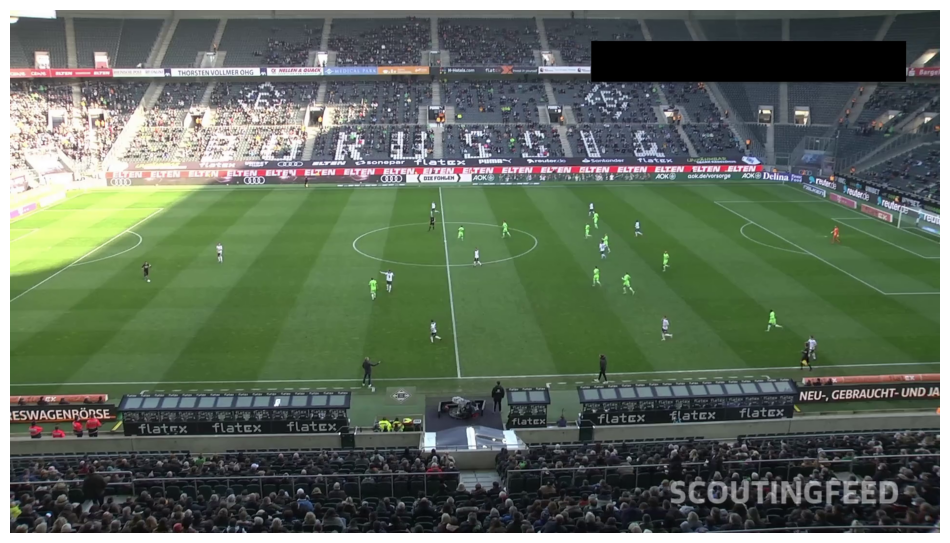

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Define path to video file
source = "/content/08fd33_0.mp4"

# Run inference on the source
results = model(source, stream=True)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the video source
SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"

# Load your YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Replace with your model path if needed

# Create a generator for video frames
frame_generator = cv2.VideoCapture(SOURCE_VIDEO_PATH)

# List to store annotated frames
annotated_frames = []

while True:
    ret, frame = frame_generator.read()
    if not ret:
        break

    # Perform inference on the current frame
    result = model(frame)  # This will return the results directly

    # Extract the boxes and classes from the result
    boxes = result[0].boxes
    detections = boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format
    confidences = boxes.conf.cpu().numpy()  # Get confidence scores
    class_ids = boxes.cls.cpu().numpy().astype(int)  # Get class IDs

    # Annotate the frame
    for box, confidence, class_id in zip(detections, confidences, class_ids):
        x1, y1, x2, y2 = box
        label = f"{model.names[class_id]}: {confidence:.2f}"
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(frame, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    annotated_frames.append(frame)

# Release the video capture
frame_generator.release()

# Plot the annotated frames using Matplotlib
plt.figure(figsize=(12, 6))
for i, annotated_frame in enumerate(annotated_frames):
    plt.subplot(3, 4, i+1)  # Adjust number of subplots based on frames
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.tight_layout()
plt.show()



0: 384x640 2 goalkeepers, 23 players, 3 referees, 14.2ms
Speed: 2.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


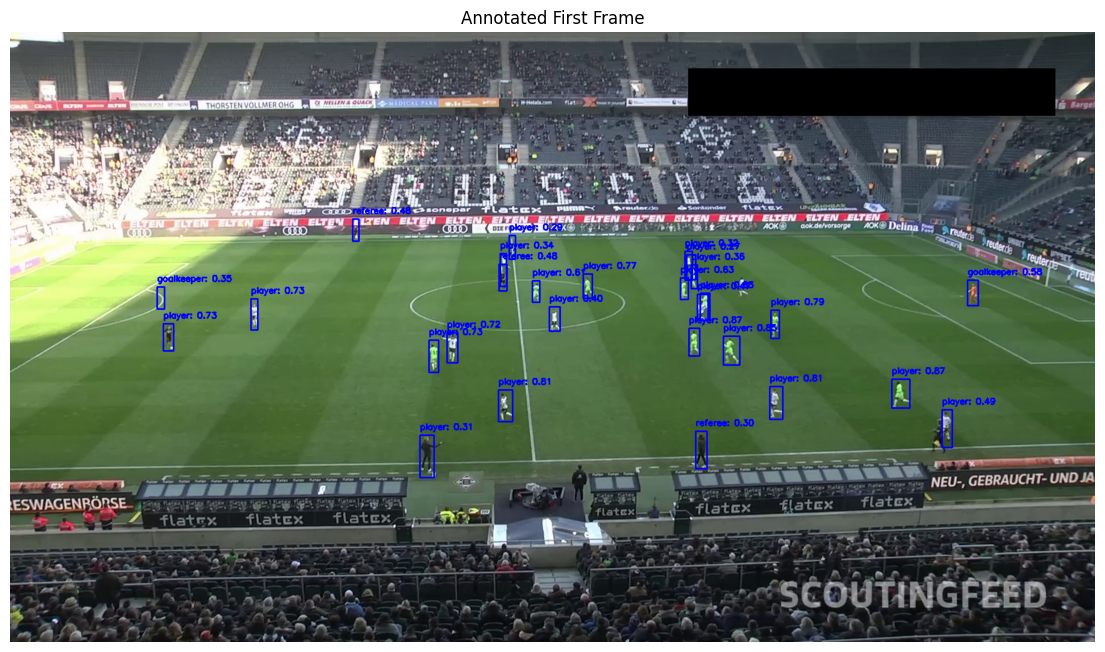

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the video source
SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"

# Load your YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Replace with your model path if needed

# Create a generator for video frames
frame_generator = cv2.VideoCapture(SOURCE_VIDEO_PATH)

# Read the first frame
ret, frame = frame_generator.read()
if not ret:
    print("Failed to read the first frame.")
    frame_generator.release()
    exit()

# Perform inference on the first frame
result = model(frame)  # This will return the results directly

# Extract the boxes and classes from the result
boxes = result[0].boxes
detections = boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format
confidences = boxes.conf.cpu().numpy()  # Get confidence scores
class_ids = boxes.cls.cpu().numpy().astype(int)  # Get class IDs

# Annotate the frame
for box, confidence, class_id in zip(detections, confidences, class_ids):
    x1, y1, x2, y2 = box
    label = f"{model.names[class_id]}: {confidence:.2f}"
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    cv2.putText(frame, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Release the video capture
frame_generator.release()

# Plot the annotated first frame using Matplotlib
plt.figure(figsize=(14, 12))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Annotated First Frame')
plt.show()


In [ ]:
print(result)  # Add this line to inspect the output structure


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}
obb: None
orig_img: array([[[242, 252, 251],
        [242, 252, 251],
        [242, 252, 251],
        ...,
        [ 71,  74,  64],
        [ 72,  75,  65],
        [ 72,  75,  65]],

       [[242, 252, 251],
        [242, 252, 251],
        [242, 252, 251],
        ...,
        [ 71,  74,  64],
        [ 71,  74,  64],
        [ 71,  74,  64]],

       [[238, 253, 251],
        [238, 253, 251],
        [238, 253, 251],
        ...,
        [ 66,  69,  59],
        [ 65,  68,  58],
        [ 64,  67,  57]],

       ...,

       [[ 23,  26,  26],
        [ 24,  27,  27],
        [ 28,  31,  31],
        ...,
        [114, 119, 117],
        [100, 110, 107],
        [ 95, 105, 102]],

       [[ 25,  25,  25],
        [ 29,  29,  29],
        [ 31,  31,  31],
        ...,
        [114, 117, 1